<a href="https://colab.research.google.com/github/Rahulyadav147/HOUSE_PRICE_PREDICTION/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [5]:

housing_dataset = pd.read_csv("/content/BostonHousing.csv")
housing_dataset.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [6]:
housing_dataset.shape

(506, 14)

In [7]:
plt.rcParams["figure.figsize"] = [8,6]
corr = housing_dataset.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,-0.273687


<Axes: >

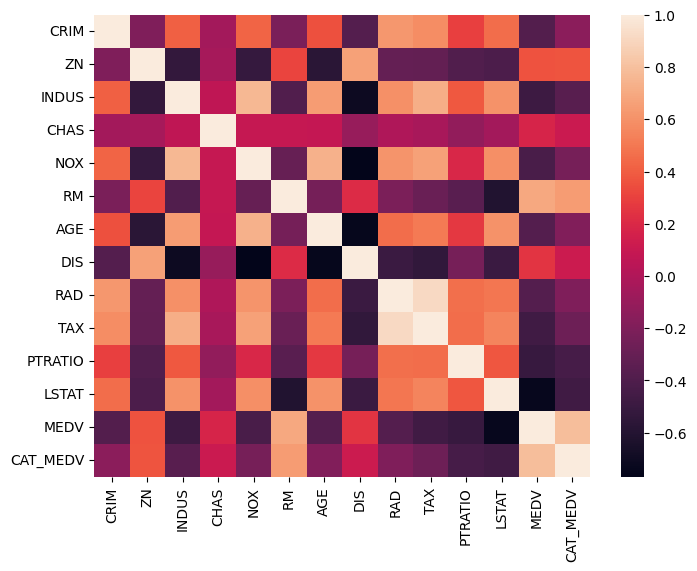

In [8]:
sns.heatmap(corr)

In [10]:
X = housing_dataset.drop(["MEDV"], axis = 1)
y = housing_dataset.filter(["MEDV"], axis = 1)

In [11]:
X.head()
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


from matplotlib import pyplot as plt
_df_0['MEDV'].plot(kind='hist', bins=20, title='MEDV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MEDV'].plot(kind='line', figsize=(8, 4), title='MEDV')
plt.gca().spines[['top', 'right']].set_visible(False)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:

house_predictor = LinearRegression()
house_predictor.fit(X_train, y_train)
y_pred = house_predictor.predict(X_test)

In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.679279515210796
Mean Squared Error: 14.800689134522331
Root Mean Squared Error: 3.847166377286318


In [15]:
comparison_df = pd.DataFrame({'Actual' : y_test.values.tolist(), 'Predicted' : y_pred.tolist()})
comparison_df


,Actual,Predicted
0,[23.6],[24.307404595719667]
1,[32.4],[41.48542430443845]
2,[13.6],[16.461881013459635]
3,[22.8],[25.550524066200097]
4,[16.1],[16.749668867037165]
...,...,...
97,[17.9],[6.907349861672138]
98,[9.6],[15.230576873382056]
99,[17.2],[16.405215357493084]
100,[22.5],[21.365544981802266]


In [16]:
print (house_predictor.coef_)

[[-1.26992280e-01 -2.49486471e-02  1.30542551e-01  2.62754514e+00
  -1.49302901e+01  1.34735180e+00 -1.40221821e-02 -6.38321094e-01
   1.45016637e-01 -6.91427570e-03 -5.52234941e-01 -4.67126667e-01
   1.18631269e+01]]


In [17]:

X_test.values[1].shape

(13,)

In [18]:
single_point = X_test.values[1].reshape(1,-1)
single_point.shape

(1, 13)

In [19]:
house_predictor.predict(X_test.values[1].reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[41.4854243]])

In [20]:
y_test.values[1]

array([32.4])

In [ ]:
#The actual value is 32 thousand, which means that our prediction has an error of an
#estimated 4 thousand.
